# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [88]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [89]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [90]:
# Criando cross-tab entre sexo e a variável resposta
ctab = pd.crosstab(df['sex'], df['flag_doente'], margins = True)
ctab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [91]:
# Incluindo coluna de probabilidade de se ter uma doença cardiaca
ctab['prob sick heart'] = ctab[1]/ctab['All']
ctab

flag_doente,0,1,All,prob sick heart
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [92]:
# Incluindo coluna com a quantidade média de doentes proporcional 
ctab['mean sick heart'] = (ctab[1]/ctab['All'])*100
#ctab.loc['All', 1] calcula a média com o tatal geral
ctab

flag_doente,0,1,All,prob sick heart,mean sick heart
sex,,,,,
0.0,72,25,97,0.257732,25.773196
1.0,92,114,206,0.553398,55.339806
All,164,139,303,0.458746,45.874587


In [93]:
# Incluindo a coluna Odds(chance) dividindo o evento de ter doença pelo não evento, que é não ter doença
ctab['Odds'] = ctab[1] / ctab[0]
ctab

flag_doente,0,1,All,prob sick heart,mean sick heart,Odds
sex,,,,,,
0.0,72,25,97,0.257732,25.773196,0.347222
1.0,92,114,206,0.553398,55.339806,1.239130
All,164,139,303,0.458746,45.874587,0.847561


In [94]:
# Incluindo a coluna Odds Ratio(razão da chance), usando a coluna 'All' como casela de referência
ctab['Odds Ratio'] = ctab['Odds']/ctab.loc['All', 'Odds']
ctab


flag_doente,0,1,All,prob sick heart,mean sick heart,Odds,Odds Ratio
sex,,,,,,,
0.0,72,25,97,0.257732,25.773196,0.347222,0.409672
1.0,92,114,206,0.553398,55.339806,1.239130,1.461996
All,164,139,303,0.458746,45.874587,0.847561,1.000000


In [95]:
# Incluindo a coluna com logaritimo de Odds
ctab['Log Odds'] = np.log(ctab['Odds'])
ctab

flag_doente,0,1,All,prob sick heart,mean sick heart,Odds,Odds Ratio,Log Odds
sex,,,,,,,,
0.0,72,25,97,0.257732,25.773196,0.347222,0.409672,-1.057790
1.0,92,114,206,0.553398,55.339806,1.239130,1.461996,0.214410
All,164,139,303,0.458746,45.874587,0.847561,1.000000,-0.165392


In [96]:
# Incluindo o Weight of Evidence(peso da evidência), que é calculado pelo LOG do Odds Ratio
ctab['WOE'] = np.log(ctab['Odds Ratio'])
ctab

flag_doente,0,1,All,prob sick heart,mean sick heart,Odds,Odds Ratio,Log Odds,WOE
sex,,,,,,,,,
0.0,72,25,97,0.257732,25.773196,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,55.339806,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,45.874587,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [97]:
age_max = max(df['age']) # Verificando idade máxima
print(age_max)

age_min = min(df['age']) # Verificando idade minima
print(age_min)

margem = (age_max - age_min) / 5 # Verificando o quão espaçado deve ficar a margem de idades
margem

77.0
29.0


9.6

In [98]:
'''Criando nova coluna com intervalo de 10 em 10, baseado no valor de 9.6 obtido acima, dividindo assim
a idade em 5 partes, do 29 ao 77 que são os limites de idade do DF'''

intervalos = [29, 39, 49, 59, 69, 77]
rotulos = ['29-39', '40-49', '50-59', '60-69', '70-77']
df['age range'] = pd.cut(df['age'], bins=intervalos, labels=rotulos)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age range
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,60-69
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,60-69
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,60-69
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,29-39
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,40-49
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,60-69
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,50-59
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,50-59


In [99]:
ctab2 = pd.crosstab(df['age range'], df['flag_doente'], margins = True)
ctab2

flag_doente,0,1,All
age range,,,
29-39,10,4,14
40-49,50,22,72
50-59,65,60,125
60-69,32,49,81
70-77,6,4,10
All,163,139,302


#### Incluido todos os passos do exercício 1, porém aplicados a nova cross-tab com uso da idade dividida em 5 categorias.

In [100]:
# Incluindo coluna de probabilidade de se ter uma doença cardiaca
ctab2['prob sick heart'] = ctab2[1] / ctab2['All']

# Incluindo coluna com a quantidade média de doentes proporcional ao total de cada faixa de idade
ctab2['mean sick heart'] = (ctab2[1] / ctab2['All']) * 100
#ctab2.loc['All', 1] com esse código calcula a média com o total geral

# Incluindo a coluna Odds (chance) dividindo o evento de ter doença pelo não evento, que é não ter doença
ctab2['Odds'] = ctab2[1] / ctab2[0]

# Incluindo a coluna Odds Ratio (razão da chance), usando a coluna 'All' como casela de referência
ctab2['Odds Ratio'] = ctab2['Odds'] / ctab2.loc['All', 'Odds']


# Incluindo a coluna com logaritmo de Odds
ctab2['Log Odds'] = np.log(ctab2['Odds'])

# Incluindo o Weight of Evidence (peso da evidência), que é calculado pelo LOG do Odds Ratio
ctab2['WOE'] = np.log(ctab2['Odds Ratio'])
ctab2

flag_doente,0,1,All,prob sick heart,mean sick heart,Odds,Odds Ratio,Log Odds,WOE
age range,,,,,,,,,
29-39,10,4,14,0.285714,28.571429,0.400000,0.469065,-0.916291,-0.757014
40-49,50,22,72,0.305556,30.555556,0.440000,0.515971,-0.820981,-0.661704
50-59,65,60,125,0.480000,48.000000,0.923077,1.082457,-0.080043,0.079234
60-69,32,49,81,0.604938,60.493827,1.531250,1.795638,0.426084,0.585361
70-77,6,4,10,0.400000,40.000000,0.666667,0.781775,-0.405465,-0.246189
All,163,139,302,0.460265,46.026490,0.852761,1.000000,-0.159276,0.000000


In [101]:
''' Fiquei em dúvida se era para tirar a média para cada grupo de idade, porque no exercício é pedido
apenas para tirar a média, mas como não fazia sentido repetir a média em uma coluna, tirei a média
da idade para cada intervalo. Primeiro os valores são agrupados com -> .groupby('age range')['age']
e posteriormente é retirado a média com .transform('mean'), tentei usar o mean direto e não deu certo.'''


df['mean age'] = df.groupby('age range')['age'].transform('mean')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age range,mean age
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,60-69,63.716049
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,60-69,63.716049
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,60-69,63.716049
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,29-39,36.714286
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,40-49,44.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,40-49,44.333333
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,60-69,63.716049
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,50-59,55.032000
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,50-59,55.032000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<Axes: xlabel='sex'>

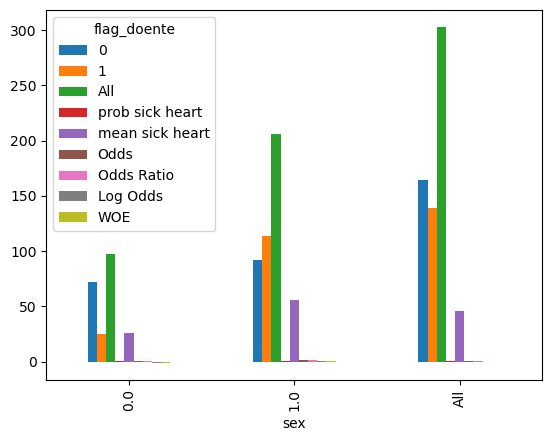

In [102]:
ctab.plot(kind='bar')

<Axes: xlabel='age range'>

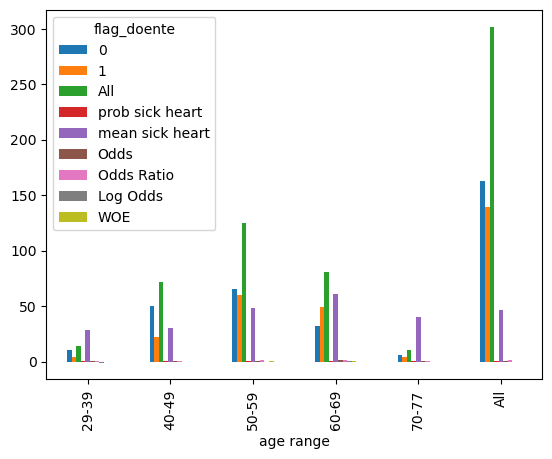

In [103]:
ctab2.plot(kind='bar')